In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.express as px
import seaborn as sns
import pickle

hfont = {'fontname':'Myriad Pro'}
import matplotlib.ticker as mtick
from matplotlib import gridspec
import matplotlib.colors as colors
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn
import inputfraction_functions as fracfn

In [2]:
path = Path(os.getcwd()).parents[0]

fracpath = os.path.join(path, 'input_fraction')
fracpath_csv = os.path.join(fracpath, 'csv')

paramspath = os.path.join(path, 'compare_linfit_params')

# datapath= os.path.join(path, 'data')

figpath = os.path.join(path, 'Figures')
hfn.dir_check(figpath)
    
figs45path = os.path.join(figpath, 'FigS16')
hfn.dir_check(figs45path)

figs45panelpaths = os.path.join(figs45path, 'panels')
hfn.dir_check(figs45panelpaths)

# Panel A - plot V1 vs PM data based on input fraction

In [3]:
areas_sel = ['VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'LGd', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD',]

In [4]:
df_frac = pd.read_csv(os.path.join(fracpath_csv, 'df_all_fraction.csv'))

In [5]:
df_frac.loc[df_frac['starter'] > 200, 'starter_cat'] = 'high'
df_frac.loc[df_frac['starter'] < 200, 'starter_cat'] = 'low'

In [6]:
df_frac_s = pd.DataFrame()
for area in areas_sel:
    this_frac = df_frac[['starter', 'starter_cat', 'target area','area', area]].reset_index(drop = True)
    this_frac['input_area'] = area
    this_frac.columns = ['starter', 'starter_cat','targeted_area','target_area', 'input_fraction', 'area']
    df_frac_s = pd.concat([df_frac_s, this_frac], axis = 0).reset_index(drop = True)

In [7]:
df_frac_s['grouped_area'] = 'Dist_ctx'
df_frac_s.loc[df_frac_s['area'].isin(['VISp', 'VISpm', 'VISl', 'VISam', 'VISal']), 'grouped_area'] = 'VIS'

df_frac_s.loc[df_frac_s['area'].isin(['LGd', 'LP', 'LD', 'AM']), 'grouped_area'] = 'Thal'

df_frac_s.loc[df_frac_s['area'].isin(['RSPd', 'RSPv', 'RSPagl']), 'grouped_area'] = 'RSP'

In [8]:
result = df_frac_s.groupby(['area', 'target_area'], as_index=False).agg(
                      {'input_fraction':['mean','std', 'count']})

In [9]:
palette ={"V1": "darkblue", "PM": "royalblue"}

In [10]:
df_frac_s=df_frac_s[(df_frac_s['target_area']=='V1') | (df_frac_s['target_area']=='PM')]

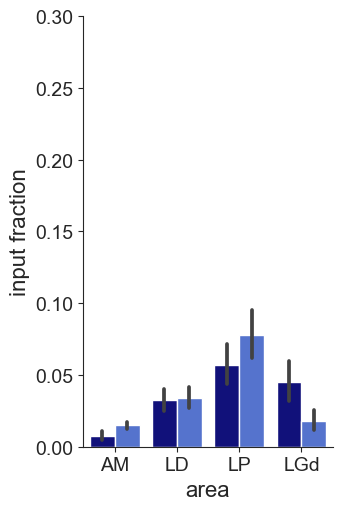

In [11]:
sns.set_style("ticks")
sns.catplot(data = df_frac_s[df_frac_s.grouped_area == 'Thal'],  x = 'area', y ='input_fraction', hue = 'target_area', kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.ylabel('input fraction', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0,0.3)

fig.savefig(os.path.join(figs45panelpaths, 'figS16a1.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS16a1.eps'),  bbox_inches='tight', format = 'eps')

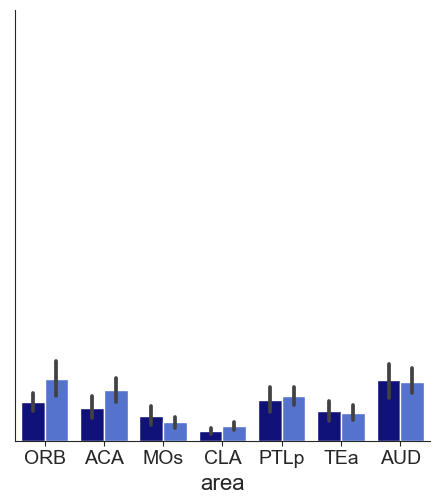

In [12]:
sns.catplot(data = df_frac_s[df_frac_s.grouped_area == 'Dist_ctx'],  x = 'area', y ='input_fraction', hue = 'target_area', kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(5,5)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0, 0.3)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS16a2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS16a2.eps'),  bbox_inches='tight', format = 'eps')

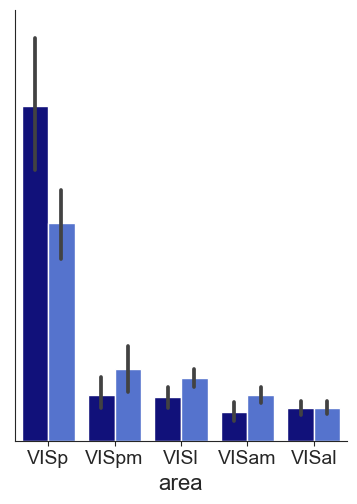

In [13]:
sns.catplot(data = df_frac_s[df_frac_s.grouped_area == 'VIS'],  x = 'area', y ='input_fraction', hue = 'target_area', kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(4, 5)
plt.ylim(0, 0.3)

ax.get_yaxis().set_visible(False)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS16a3.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS16a3.eps'),  bbox_inches='tight', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


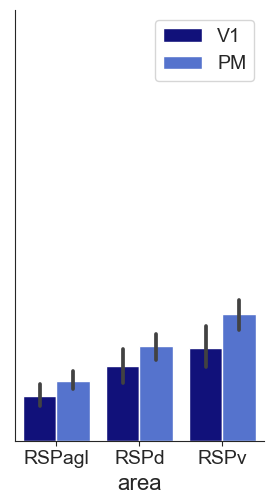

In [14]:
sns.catplot(data = df_frac_s[df_frac_s.grouped_area == 'RSP'],  x = 'area', y ='input_fraction', hue = 'target_area', kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.legend(loc = 'upper right', fontsize = 14)
plt.ylim(0, 0.3)

ax.get_yaxis().set_visible(False)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS16a4.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS16a4.eps'),  bbox_inches='tight', format = 'eps')

# Panel A1 - plot V1 vs PM based on input fraction - high starters only

In [15]:
df_frac_h = df_frac_s[df_frac_s.starter_cat == 'high']

In [16]:
result_h= df_frac_h.groupby(['area', 'target_area'], as_index=False).agg(
                      {'input_fraction':['mean','std', 'count']})

In [17]:
df_frac_h=df_frac_h[(df_frac_h['target_area']=='V1') | (df_frac_h['target_area']=='PM')]

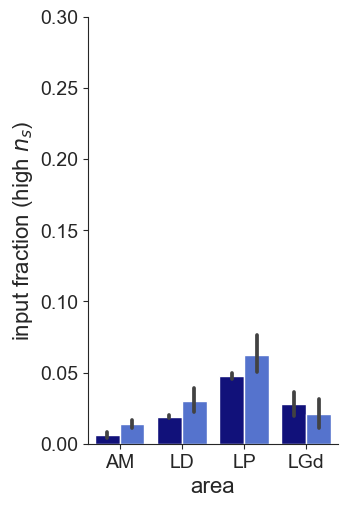

In [18]:
sns.set_style("ticks")
sns.catplot(data = df_frac_h[df_frac_h.grouped_area == 'Thal'],  x = 'area', y ='input_fraction', hue = 'target_area', hue_order = ['V1', 'PM'], kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.ylabel('input fraction (high $n_s$)', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0,0.3)

fig.savefig(os.path.join(figs45panelpaths, 'figS16b1.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS16b1.eps'),  bbox_inches='tight', format = 'eps')

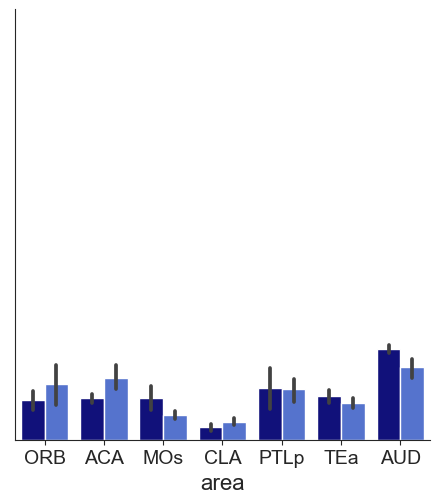

In [19]:
sns.catplot(data = df_frac_h[df_frac_h.grouped_area == 'Dist_ctx'],  x = 'area', y ='input_fraction', hue = 'target_area', hue_order = ['V1', 'PM'], kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(5,5)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0, 0.3)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS16b2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS16b2.eps'),  bbox_inches='tight', format = 'eps')

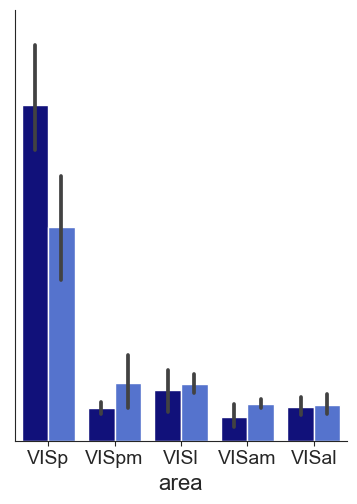

In [20]:
sns.catplot(data = df_frac_h[df_frac_h.grouped_area == 'VIS'],  x = 'area', y ='input_fraction', hue = 'target_area', hue_order = ['V1', 'PM'], kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(4, 5)
plt.ylim(0, 0.3)

ax.get_yaxis().set_visible(False)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS16b3.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS16b3.eps'),  bbox_inches='tight', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


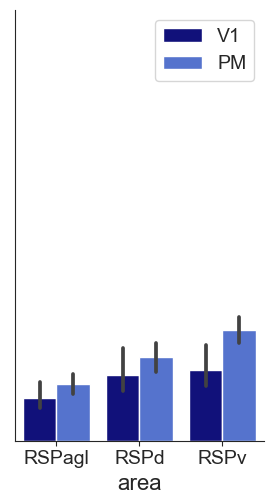

In [21]:
sns.catplot(data = df_frac_h[df_frac_h.grouped_area == 'RSP'],  x = 'area', y ='input_fraction', hue = 'target_area', hue_order = ['V1', 'PM'], kind="bar", legend=False, palette = palette)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.legend(loc = 'upper right', fontsize = 14)
plt.ylim(0, 0.3)

ax.get_yaxis().set_visible(False)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS16b4.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS16b4.eps'),  bbox_inches='tight', format = 'eps')

In [22]:
df_frac_s_v1 = df_frac_s[df_frac_s.target_area == 'V1']
df_frac_s_pm = df_frac_s[df_frac_s.target_area == 'PM']

In [23]:
df_frac_h_v1 = df_frac_h[df_frac_h.target_area == 'V1']
df_frac_h_pm = df_frac_h[df_frac_h.target_area == 'PM']

In [24]:
res_v1 = df_frac_s_v1.groupby(['area'], as_index=False).agg({'input_fraction':['mean', 'std']})
res_pm = df_frac_s_pm.groupby(['area'], as_index=False).agg({'input_fraction':['mean', 'std']})

In [25]:
res_h_v1 = df_frac_h_v1.groupby(['area'], as_index=False).agg({'input_fraction':['mean', 'std']})
res_h_pm = df_frac_h_pm.groupby(['area'], as_index=False).agg({'input_fraction':['mean', 'std']})

# Panel B - plot V1 vs PM data based on intercept

In [26]:
areas_sel = ['VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'LGd', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD']

In [27]:
areas_sel_noLGd = ['VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD']

In [28]:
def add_func_areas(df):
    df['func area'] = 0
    df.loc[df['area'].isin(list_VIS), 'func area'] = 'VIS'
    df.loc[df['area'].isin(list_RSP), 'func area'] = 'RSP'
    df.loc[df['area'].isin(list_Thal), 'func area'] = 'Thal'
    df.loc[df['area'].isin(list_Dist_ctx), 'func area'] = 'Dist_ctx'
    df["func area"].replace({0: "whole brain"}, inplace=True)
    return df

In [29]:
int_V1_log = pd.read_csv(os.path.join(paramspath,'df_CI95_int_targets_V1.csv'))
int_V1_log = int_V1_log.drop(int_V1_log.columns[[0]], axis=1) 

int_V1_lin = pd.read_csv(os.path.join(paramspath,'df_CI95_int_targets_V1_lin.csv'))
int_V1_lin = int_V1_lin.drop(int_V1_lin.columns[[0]], axis=1) 

In [30]:
int_PM_log = pd.read_csv(os.path.join(paramspath,'df_CI95_int_targets_PM.csv'))
int_PM_log = int_PM_log.drop(int_PM_log.columns[[0]], axis=1) 

int_PM_lin = pd.read_csv(os.path.join(paramspath,'df_CI95_int_targets_PM_lin.csv'))
int_PM_lin = int_PM_lin.drop(int_PM_lin.columns[[0]], axis=1) 

In [31]:
int_V1_log = int_V1_log[int_V1_log.area.isin(areas_sel_noLGd)].reset_index(drop = True)
int_PM_log = int_PM_log[int_PM_log.area.isin(areas_sel_noLGd)].reset_index(drop = True)

In [32]:
int_V1_log['grouped_area'] = 'Dist_ctx'
int_V1_log.loc[int_V1_log['area'].isin(['VISp', 'VISpm', 'VISl', 'VISam', 'VISal']), 'grouped_area'] = 'VIS'

int_V1_log.loc[int_V1_log['area'].isin(['LGd', 'LP', 'LD', 'AM']), 'grouped_area'] = 'Thal'

int_V1_log.loc[int_V1_log['area'].isin(['RSPd', 'RSPv', 'RSPagl']), 'grouped_area'] = 'RSP'

In [33]:
int_PM_log['grouped_area'] = 'Dist_ctx'
int_PM_log.loc[int_PM_log['area'].isin(['VISp', 'VISpm', 'VISl', 'VISam', 'VISal']), 'grouped_area'] = 'VIS'

int_PM_log.loc[int_PM_log['area'].isin(['LGd', 'LP', 'LD', 'AM']), 'grouped_area'] = 'Thal'

int_PM_log.loc[int_PM_log['area'].isin(['RSPd', 'RSPv', 'RSPagl']), 'grouped_area'] = 'RSP'

In [34]:
int_PM_lin['grouped_area'] = 'Thal'
int_V1_lin['grouped_area'] = 'Thal'

In [35]:
int_PM_lin[['mean int', 'median int', '95%quant-low', '95%quant-high']] = int_PM_lin[['mean int', 'median int', '95%quant-low', '95%quant-high']].apply(lambda x: np.log10(x))#np.log10(x))
int_V1_lin[['mean int', 'median int', '95%quant-low', '95%quant-high']] = int_V1_lin[['mean int', 'median int', '95%quant-low', '95%quant-high']].apply(lambda x: np.log10(x))#np.log10(x))

In [36]:
int_PM_log['target'] = 'PM'
int_PM_lin['target'] = 'PM'

int_V1_log['target'] = 'V1'
int_V1_lin['target'] = 'V1'

In [37]:
int_PM_log = pd.concat([int_PM_log, int_PM_lin], axis = 0).reset_index(drop = True)
int_V1_log = pd.concat([int_V1_log, int_V1_lin], axis = 0).reset_index(drop = True)

In [38]:
int_log = pd.concat([int_V1_log, int_PM_log], axis = 0).reset_index(drop = True)

In [39]:
int_PM_log_Thal = int_PM_log[int_PM_log.grouped_area == 'Thal']
int_V1_log_Thal = int_V1_log[int_V1_log.grouped_area == 'Thal']

In [40]:
int_PM_errors_Thal = [int_PM_log_Thal['mean int'].values-int_PM_log_Thal['95%quant-low'].values, int_PM_log_Thal['95%quant-high'].values-int_PM_log_Thal['mean int'].values]
#int_V1_errors_Thal = [int_V1_log_Thal['95%quant-low'].values-int_V1_log_Thal['mean int'].values, int_V1_log_Thal['mean int'].values-int_V1_log_Thal['95%quant-high'].values]
int_V1_errors_Thal = [int_V1_log_Thal['mean int'].values-int_V1_log_Thal['95%quant-low'].values, int_V1_log_Thal['95%quant-high'].values-int_V1_log_Thal['mean int'].values]

In [41]:
int_PM_log_VIS = int_PM_log[int_PM_log.grouped_area == 'VIS']
int_V1_log_VIS = int_V1_log[int_V1_log.grouped_area == 'VIS']

In [42]:
int_PM_errors_VIS = [int_PM_log_VIS['mean int'].values-int_PM_log_VIS['95%quant-low'].values, int_PM_log_VIS['95%quant-high'].values-int_PM_log_VIS['mean int'].values]
#int_V1_errors_VIS = [int_V1_log_VIS['95%quant-low'].values-int_V1_log_VIS['mean int'].values, int_V1_log_VIS['mean int'].values-int_V1_log_VIS['95%quant-high'].values]
int_V1_errors_VIS = [int_V1_log_VIS['mean int'].values-int_V1_log_VIS['95%quant-low'].values, int_V1_log_VIS['95%quant-high'].values-int_V1_log_VIS['mean int'].values]

In [43]:
int_PM_log_Dist = int_PM_log[int_PM_log.grouped_area == 'Dist_ctx']
int_V1_log_Dist = int_V1_log[int_V1_log.grouped_area == 'Dist_ctx']

In [44]:
int_PM_errors_Dist = [int_PM_log_Dist['mean int'].values-int_PM_log_Dist['95%quant-low'].values, int_PM_log_Dist['95%quant-high'].values-int_PM_log_Dist['mean int'].values]
#int_V1_errors_Dist = [int_V1_log_Dist['95%quant-low'].values-int_V1_log_Dist['mean int'].values, int_V1_log_Dist['mean int'].values-int_V1_log_Dist['95%quant-high'].values]
int_V1_errors_Dist = [int_V1_log_Dist['mean int'].values-int_V1_log_Dist['95%quant-low'].values, int_V1_log_Dist['95%quant-high'].values-int_V1_log_Dist['mean int'].values]

In [45]:
int_PM_log_RSP = int_PM_log[int_PM_log.grouped_area == 'RSP']
int_V1_log_RSP = int_V1_log[int_V1_log.grouped_area == 'RSP']

In [46]:
int_PM_errors_RSP = [int_PM_log_RSP['mean int'].values-int_PM_log_RSP['95%quant-low'].values, int_PM_log_RSP['95%quant-high'].values-int_PM_log_RSP['mean int'].values]
#int_V1_errors_RSP = [int_V1_log_RSP['95%quant-low'].values-int_V1_log_RSP['mean int'].values, int_V1_log_RSP['mean int'].values-int_V1_log_RSP['95%quant-high'].values]
int_V1_errors_RSP = [int_V1_log_RSP['mean int'].values-int_V1_log_RSP['95%quant-low'].values, int_V1_log_RSP['95%quant-high'].values-int_V1_log_RSP['mean int'].values]

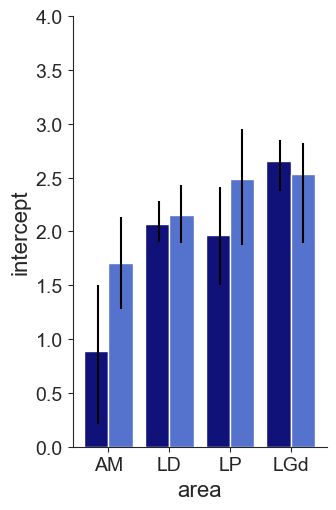

In [47]:
sns.set_style("ticks")
sns.catplot(data = int_log[int_log.grouped_area == 'Thal'],  x = 'area', y ='mean int', hue = 'target', kind="bar", legend=False, palette = palette)

plt.errorbar([-0.17,1-0.17,2-0.17,3-0.17], y = int_V1_log_Thal['mean int'].values, yerr = int_V1_errors_Thal, c= 'k',fmt='none')
plt.errorbar([0+0.2,1+0.2,2+0.2,3+0.2], y = int_PM_log_Thal['mean int'].values, yerr = int_PM_errors_Thal, c= 'k',fmt='none')

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.ylabel('intercept', fontsize = 16)
plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0, 4)



fig.savefig(os.path.join(figs45panelpaths, 'figS16c1.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS16c1.eps'),  bbox_inches='tight', format = 'eps')

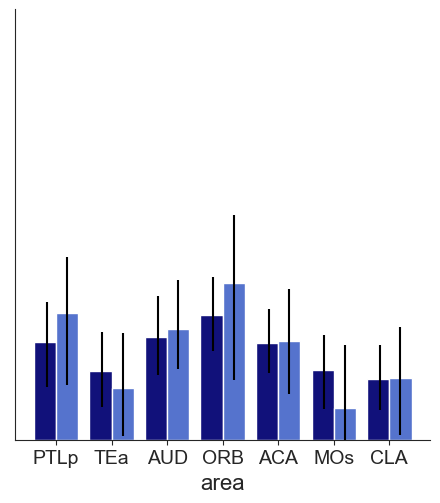

In [48]:
sns.catplot(data = int_log[int_log.grouped_area == 'Dist_ctx'],  x = 'area', y ='mean int', hue = 'target', kind="bar", legend=False, palette = palette)

plt.errorbar([-0.17, 1-0.17, 2-0.17, 3-0.17, 4-0.17, 5-0.17, 6-0.17], y = int_V1_log_Dist['mean int'].values, yerr = int_V1_errors_Dist, c= 'k',fmt='none')
plt.errorbar([0+0.2, 1+0.2, 2+0.2, 3+0.2, 4+0.2, 5+0.2, 6+0.2], y = int_PM_log_Dist['mean int'].values, yerr = int_PM_errors_Dist, c= 'k',fmt='none')  
                         
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(5,5)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.ylim(0, 5)
ax.get_yaxis().set_visible(False)



fig.savefig(os.path.join(figs45panelpaths, 'figS16c2.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS16c2.eps'),  bbox_inches='tight', format = 'eps')

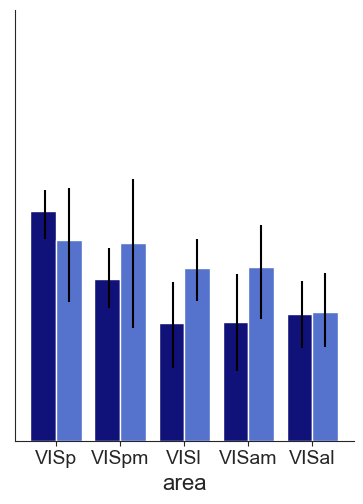

In [49]:
sns.catplot(data = int_log[int_log.grouped_area == 'VIS'],  x = 'area', y ='mean int', hue = 'target', kind="bar", legend=False, palette = palette)

plt.errorbar([-0.17, 1-0.17, 2-0.17, 3-0.17, 4-0.17], y = int_V1_log_VIS['mean int'].values, yerr = int_V1_errors_VIS, c= 'k',fmt='none')
plt.errorbar([0+0.2, 1+0.2, 2+0.2, 3+0.2, 4+0.2],y = int_PM_log_VIS['mean int'].values, yerr = int_PM_errors_VIS, c= 'k',fmt='none')     

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(4, 5)

plt.ylim(0, 5)

ax.get_yaxis().set_visible(False)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS16c3.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS16c3.eps'),  bbox_inches='tight', format = 'eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


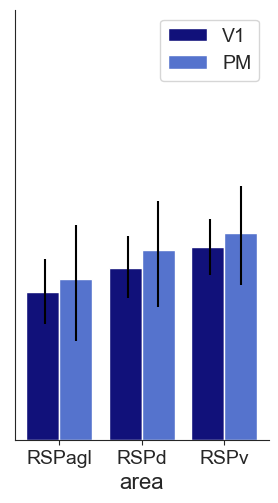

In [50]:
sns.catplot(data = int_log[int_log.grouped_area == 'RSP'],  x = 'area', y ='mean int', hue = 'target', kind="bar", legend=False, palette = palette)

plt.errorbar([-0.17, 1-0.17, 2-0.17], y = int_V1_log_RSP['mean int'].values, yerr = int_V1_errors_RSP, c= 'k',fmt='none')
plt.errorbar([0+0.2, 1+0.2, 2+0.2], y = int_PM_log_RSP['mean int'].values, yerr = int_PM_errors_RSP, c= 'k',fmt='none')     

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(3, 5)

plt.legend(loc = 'upper right', fontsize = 14)
plt.ylim(0, 5)

ax.get_yaxis().set_visible(False)

plt.xlabel('area', fontsize = 16)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.get_yaxis().set_visible(False)

fig.savefig(os.path.join(figs45panelpaths, 'figS16c4.png'),  bbox_inches='tight')
fig.savefig(os.path.join(figs45panelpaths, 'figS16c4.eps'),  bbox_inches='tight', format = 'eps')